# Import Libraries

In [10]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns 
import lightgbm as lgb 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from choices import param_dict 
from utilities import deets

In [12]:
class make_model():
    def __init__(self , name , clf , gamma ,x ,y):
        self.name = name
        self.clf = clf 
        self.gamma = gamma 
        self.x = x 
        self.y = y 
        
    def validate(self , fname= '' , k=10 , normalize_prob=0 , score_average = 'macro'):
        from utilities import simple_cv
        #self.weight = self.calc_weight(self.gamma ,self.y)
        res = simple_cv(self.x,self.y , model=self.clf , k=k , normalize_prob=normalize_prob , score_average = score_average)
        res['gamma'] = self.gamma 
        #res['class_weight'] = calc_weight(slef)
        print(res['class_scores'])
        self.result = res
        if(fname):
            import joblib
            joblib.dump(res , fname)
        return self
    
    def train(self):
        clf = self.clf
        clf.fit(self.x , self.y)
        return self
    def save(self , fname):
        import joblib
        joblib.dump(self , fname)

# Load data

In [13]:
x = pd.read_csv('compiled_data_v3/x_phot_minmax.csv' , index_col='name')
x_col = x.columns.to_list()
i = pd.read_csv('compiled_data_v3/id_frame.csv' , index_col='name')
df = pd.merge(i,x , left_index =True , right_index =True )
df = df[df['offset']<1.01]
# feat_to_drop = np.unique(param_dict['hardness'] + param_dict['IRAC']+[
#     '0p5_2csc' , '2-10 keV (XMM)' , '1_2_csc' , '0p5_8_csc' , 
# ]+['var_inter_hard_prob_hs', 'ks_intra_prob_b', 'var_inter_hard_sigma_hm', 'var_inter_hard_prob_ms', 'var_inter_hard_prob_hm',] )

feat_to_drop = np.unique(param_dict['IRAC']+[
    '0p5_2csc' , '2-10 keV (XMM)' , '1_2_csc' , '0p5_8_csc' , 
]+['var_inter_hard_prob_hs', 'ks_intra_prob_b', 'var_inter_hard_sigma_hm', 'var_inter_hard_prob_ms', 'var_inter_hard_prob_hm',] )

classes = ['AGN' ,'STAR' ,'YSO', 'HMXB']
# classes = ['AGN' ,'STAR']
df = df[df['class'].isin(classes)]
#from sklearn.preprocessing import LabelEncoder
#y_int = LabelEncoder().fit_transform(df['class'])
deets(df,1)
u = pd.read_csv('compiled_data_v3/x_phot_minmax-unid-var-src.csv' , index_col='name')
u = u.drop(columns=feat_to_drop)
u.columns = u.columns.str.replace(' ' ,'_' , regex=False)
x = df[x_col]
x = x.drop(columns=feat_to_drop)
x.columns = x.columns.str.replace(' ' ,'_' , regex=False)
y = df['class']
deets(x)
deets(u)

_____________________________________________________
------------------------------
Number of Objects : 7082
Number of Columns : 73
------------------------------


STAR    2790
AGN     2395
YSO     1149
HMXB     748
Name: class, dtype: int64

_____________________________________________________
_____________________________________________________
------------------------------
Number of Objects : 7082
Number of Columns : 44
_____________________________________________________
_____________________________________________________
------------------------------
Number of Objects : 39893
Number of Columns : 44
_____________________________________________________


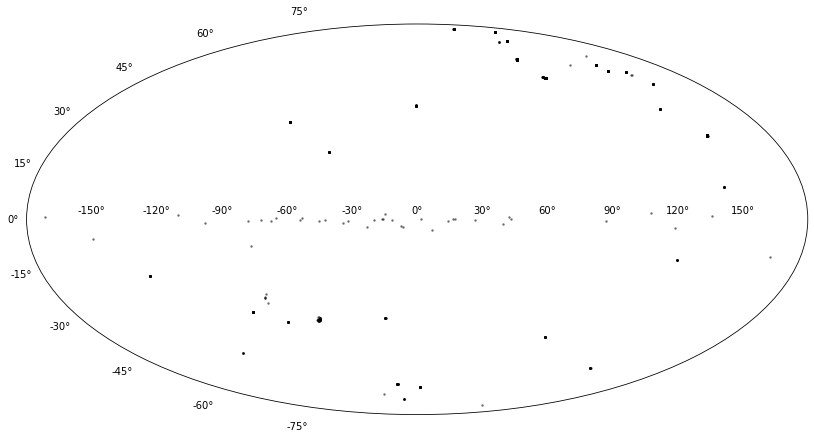

In [23]:
from astropy.coordinates import SkyCoord
from astropy import units as unit 
df_plot = pd.read_csv('compiled_data_v3/id_frame.csv' , index_col='name')
df_plot = df_plot[df_plot['class']=='HMXB']
eq = SkyCoord(df_plot['ra'] , df_plot['dec'] , unit = unit.deg)
gal = eq.galactic
plt.figure(figsize=(14,14))
plt.subplot(projection='aitoff', )
plt.scatter(gal.l.wrap_at('180d').radian, gal.b.radian , s=10, marker='.',alpha=0.4 , label='HMXB' , color='k')
# ax.set_title(classes[i-1])

In [ ]:
from astropy.coordinates import SkyCoord
from astropy import units as unit 
# plt.figure(figsize=(12,10))
# plt.subplot(111, projection='aitoff' ,)
# plt.grid(True)
classes = u_df['class'].unique()
colors =['black','lightcoral','lime','fuchsia', 'teal' , 'gold' , 'crimson' , 'indigo']
#fig , ax = plt.subplots(nrows=2, ncols=4 , figsize=(16,10) , projection='aitoff' ,)
k = 0
#cl = np.reshape(classes , ax.shape)
fig = plt.figure(figsize=(14, 18))
for i in range(1,9):
    #cl = classes[k]
    df_plot = u_pos[u_pos['class']==classes[i-1]]
    prob_th = 0.
    df_plot = df_plot[df_plot['prob']>prob_th]
    eq = SkyCoord(df_plot['ra'] , df_plot['dec'] , unit = unit.deg)
    gal = eq.galactic
    ax = fig.add_subplot(int(f'42{i}') , projection='aitoff')
    ax.scatter(gal.l.wrap_at('180d').radian, gal.b.radian , s=1 , marker='x',alpha=0.4 , label=classes[i-1] , color='k')
    ax.set_title(classes[i-1])
    #plt.legend()
#fig.suptitle('Non-Var sources distribution : Probability threshold - Argmax | Model - LightGBM-OVA | No gal coordinates')
#plt.savefig('plots/all_src_pred/lightgbm_non-var.jpg')
plt.show()

In [ ]:
eq = SkyCoord(df['ra'] , df['dec'] , unit = unit.deg)
gal = eq.galactic
ax = fig.add_subplot(int(f'42{i}') , projection='aitoff')
ax.scatter(gal.l.wrap_at('180d').radian, gal.b.radian , s=1 , marker='x',alpha=0.4 , label=classes[i-1] , color='k')
ax.set_title(classes[i-1])

In [ ]:
from astropy.coordinates import SkyCoord
from astropy import units as unit 
# plt.figure(figsize=(12,10))
# plt.subplot(111, projection='aitoff' ,)
# plt.grid(True)
classes = df['class'].unique()
colors =['black','lightcoral','lime','fuchsia', 'teal' , 'gold' , 'crimson' , 'indigo']
#fig , ax = plt.subplots(nrows=2, ncols=4 , figsize=(16,10) , projection='aitoff' ,)
k = 0
#cl = np.reshape(classes , ax.shape)
fig = plt.figure(figsize=(14, 18))
for i in range(1,9):
    #cl = classes[k]
    # df_plot = u_pos[u_pos['class']=HMXB]

    prob_th = 0.
    # df_plot = df_plot[df_plot['prob']>prob_th]
    eq = SkyCoord(df['ra'] , df['dec'] , unit = unit.deg)
    gal = eq.galactic
    ax = fig.add_subplot(int(f'42{i}') , projection='aitoff')
    ax.scatter(gal.l.wrap_at('180d').radian, gal.b.radian , s=1 , marker='x',alpha=0.4 , label=classes[i-1] , color='k')
    ax.set_title(classes[i-1])
    #plt.legend()
#fig.suptitle('Non-Var sources distribution : Probability threshold - Argmax | Model - LightGBM-OVA | No gal coordinates')
#plt.savefig('plots/all_src_pred/lightgbm_non-var.jpg')
plt.show()

# Classification

## Cross validation

In [ ]:
from utilities import simple_cv
param = {
    'objective': 'binaryclass',
    'num_class':len(np.unique(y)),
    'metric': ['auc_mu' , ] , 
    'verbosity' : 2 , 
    'deterministic' : True  , 
    'early_stopping_round' : 20 , 
    'sparse' : True , 
    'is_unbalance' : True
    }
def calc_weight(gamma , y):
    l = len(y)
    cl_weight = {}
    cl_dict = y.value_counts().to_dict()
    for cl , val in zip(cl_dict.keys() , cl_dict.values()):
        w = np.exp((l / val)*gamma)
        cl_weight[cl] = w
    #print(cl_weight)
    return cl_weight

### Train Classifier One Vs Rest

In [ ]:
print(x.columns.to_list()
)

In [ ]:
feat_set = {
    'location' : ['gal_b2', 'gal_l2',],
    'variability' :  ['var_inter_prob_b', 'var_inter_sigma_b', 'var_intra_prob_b', 'var_inter_index_b', 'kp_intra_prob_b',],
    'X-ray-mag' : ['h-csc', 'b-csc', 'm-csc', 's-csc', 'u-csc',] ,
    'x-ray-hardness' : ['hard_hs', 'hard_hm', 'hard_ms',],
    'GALEX' : ['FUV', 'NUV',],
    'SDSS' : ['u-sdss', 'g-sdss', 'r-sdss', 'i-sdss', 'z-sdss',],
    'WISE' : ['W1', 'W2', 'W3', 'W4',],
    '2MASS' : [ 'J', 'H', 'K',],
    'Gaia' : ['G', 'Bp', 'Rp', ],
    'color' : ['B-R', 'G-J', 'G-W2', 'Bp-H', 'Bp-W3', 'Rp-K', 'J-H', 'J-W1', 'W1-W2']
}

feat_set_name = ['location' , 'variability' , 'X-ray-mag' , 'GALEX' , 'SDSS', 'WISE', '2MASS', 'Gaia', 'color']
feat_res = {}
for f in feat_set_name:
    print('------------------------------------------------------------------------')
    print(f)
    print('------------------------------------------------------------------------')
    x_now = x[feat_set[f]]
    gamma = 0.07
    cl_weight = calc_weight(gamma , y)
    clf = lgb.LGBMClassifier(n_estimators = 100 ,class_weight = cl_weight , objective= 'multiclass', sparse=True , is_unbalance=True , metric=['auc_mu'] ,verbosity = 0 , random_state=42 , num_class=len(np.unique(y)), force_col_wise=True)
    model = make_model('lightGBM' , clf ,gamma , x_now, y)
    model.validate(k=15)
    model.train()
    feat_res[f] = model.result

In [ ]:
f1 = [feat_res[f]['avg_scores']['f1'] for f in feat_set_name]
plt.bar(feat_set_name,f1)
plt.show()

In [ ]:
import joblib 
joblib.dump(feat_res , 'feat_res.pkl')

In [ ]:
feat_set

In [ ]:
for f in feat_set_name:
    print(f'{f}')
    l = feat_res[f]['class_scores']
    display(l)

In [ ]:
f = joblib.load('feat_res.pkl')
f

In [ ]:
gamma = 0.07
cl_weight = calc_weight(gamma , y)
clf = lgb.LGBMClassifier(n_estimators = 100 ,class_weight = cl_weight , objective= 'multiclass', sparse=True , is_unbalance=True , metric=['auc_mu'] ,verbosity = 0 , random_state=42 , num_class=len(np.unique(y)), force_col_wise=True)
model = make_model('lightGBM' , clf ,gamma , x_now, y)
model.validate(k=10)
model.train()


In [ ]:
#save later
#model.result['res_table'].to_csv('temp_res_comp/train_prob/none_lightGBM.csv')

In [ ]:
#model.train()
#model.save('models/lightGBM-final.pkl')

## Prediction on New sources

In [ ]:
import joblib 
model = joblib.load('models/lightGBM-final.pkl')
clf = model.clf

In [ ]:
# u = []
# ui = []
# for i in range(8):
#     u.append(pd.read_csv(f'compiled_data_v3/unid-non-var-chunks/x-chunk-{i}.csv' , index_col='name'))
#     ui.append(pd.read_csv(f'compiled_data_v3/unid-non-var-chunks/id-chunk-{i}.csv' , index_col='name'))
# u = pd.concat(u)
# ui = pd.concat(ui)
ui = pd.read_csv('compiled_data_v3/id_frame-unid-var-src.csv' , index_col='name')
u = pd.read_csv('compiled_data_v3/x_phot_minmax-unid-var-src.csv' , index_col='name')
u = u.drop(columns=feat_to_drop)
u.columns = u.columns.str.replace(' ' ,'_' , regex=False)
u
u = u.reset_index()
# remove sources which were in training set
u = u[~u['name'].isin(x.index.to_list())].set_index('name')
u

In [ ]:
from utilities import softmax , norm_prob
pred_prob = (clf.predict_proba(u))
pred_prob_df = pd.DataFrame(pred_prob , columns=[f'prob_{el}' for el in clf.classes_] , index = u.index.to_list())
pred_prob_df

In [ ]:
u_df = pd.DataFrame({
    'name' : u.index.to_list() , 
    'class' : clf.predict(u) , 
    'prob' : [np.amax(el) for el in pred_prob] ,
    'prob_margin' : [el[-1]-el[-2] for el in np.sort(pred_prob , axis=1 ,)]
}).set_index('name')
u_df = pd.merge(u_df , pred_prob_df , left_index=True , right_index=True)
u_df.index.name = 'name'
u_df 

#### COnfused sources

In [ ]:
conf_src = u_df[u_df['prob_margin']<0.05]
conf_src = conf_src.rename(columns = {
    'prob_AGN' : 'AGN' , 
    'prob_HMXB' : 'HMXB' , 
    'prob_CV' : 'CV' , 
    'prob_LMXB' : 'LMXB' , 
    'prob_STAR' : 'STAR' , 
    'prob_PULSAR' : 'PULSAR' , 
    'prob_ULX' : 'ULX' , 
    'prob_YSO' : 'YSO' , 
})
conf_src_class = conf_src['class']
conf_src = conf_src.drop(columns = ['class' ,'prob' , 'prob_margin'])
conf_src

In [ ]:
img_loc = '../../thesis/final_ppt/images/'

In [ ]:
cl1 = []
cl2 = []
from utilities import set_plot
set_plot(font_size=1.5)
for n in conf_src.index.to_list():
    temp = conf_src.loc[n].sort_values(ascending=False).index.to_list()
    cl1.append(temp[1])
    cl2.append(temp[2])
from sklearn.metrics import confusion_matrix 
classes =  ['LMXB' ,'YSO' ,'ULX' , 'AGN' ,'HMXB','PULSAR' ,'STAR'   ,  'CV']
cm = confusion_matrix(cl1 , cl2 , labels =classes , normalize=None)
plt.figure(figsize=(12,9))
sns.heatmap(cm , annot=True , xticklabels = classes , yticklabels = classes , fmt = '.0f')
plt.yticks(rotation=0)
plt.savefig('../../thesis/final_ppt/images/src_confusion.jpg' , format='jpg')
plt.show()

In [ ]:
cmdf = pd.DataFrame(cm , index = classes , columns = classes)
cmdf.index.name = 'Highest prob Class'
print(cmdf.to_latex())

In [ ]:
from sklearn.preprocessing import MinMaxScaler 

In [ ]:
cmdf

In [ ]:
print(u_df.sample(frac=0.001).reset_index().head(15).to_latex(float_format='%.2f' , index=False))

In [ ]:
u_df.to_csv('temp_res_comp/unid_prob/lightGBM_none.csv')

In [ ]:
u_df = pd.read_csv('temp_res_comp/unid_prob/lightGBM_none.csv' , index_col='name')
u_df

In [ ]:
u_pos = pd.merge(u_df[['class','prob']] , ui[['ra','dec']] ,left_index=True,right_index=True)
u_pos

In [ ]:
from astropy.coordinates import SkyCoord
from astropy import units as unit 
# plt.figure(figsize=(12,10))
# plt.subplot(111, projection='aitoff' ,)
# plt.grid(True)
colors =['black','lightcoral','lime','fuchsia', 'teal' , 'gold' , 'crimson' , 'indigo']
#fig , ax = plt.subplots(nrows=2, ncols=4 , figsize=(16,10) , projection='aitoff' ,)
k = 0
#cl = np.reshape(classes , ax.shape)
fig = plt.figure(figsize=(14, 18))
for i in range(1,9):
    #cl = classes[k]
    df_plot = u_pos[u_pos['class']==classes[i-1]]
    prob_th = 0.
    df_plot = df_plot[df_plot['prob']>prob_th]
    eq = SkyCoord(df_plot['ra'] , df_plot['dec'] , unit = unit.deg)
    gal = eq.galactic
    ax = fig.add_subplot(int(f'42{i}') , projection='aitoff')
    ax.scatter(gal.l.wrap_at('180d').radian, gal.b.radian , s=1 , marker='x',alpha=0.4 , label=classes[i-1] , color='k')
    ax.set_title(classes[i-1])
    #plt.legend()
fig.suptitle('Non-Var sources distribution : Probability threshold - Argmax | Model - LightGBM-OVA | No gal coordinates')
#plt.savefig('plots/all_src_pred/lightgbm_non-var.jpg')
plt.show()

In [ ]:
u_df

In [ ]:
u_df_num = u_df['class'].value_counts().to_frame()
u_df_num = pd.concat([
                u_df['class'].value_counts() ,
                #u_df[u_df['prob']>mode]['class'].value_counts(),
                u_df[u_df['prob']>0.5]['class'].value_counts(),
                #u_df[u_df['prob']>0.6]['class'].value_counts(),
                #u_df[u_df['prob']>0.7]['class'].value_counts(),
                u_df[u_df['prob']>0.8]['class'].value_counts(),
                #u_df[u_df['prob']>0.9]['class'].value_counts(),
                u_df[u_df['prob']>0.98]['class'].value_counts(),
                 ] , axis=1)
u_df_num.columns = ['Argmax'  ,'0.5' , '0.8'  ,  f"0.98"]
u_df_num.index.name = 'class'
#u_df_num.to_csv(f'temp_res_comp/unid_num/{d_name}_{m_name}.csv')
u_df_num.append(u_df_num.sum() , ignore_index=True)
print(u_df_num.to_markdown())

In [ ]:
print(u_df_num.to_latex(bold_rows=True))

In [ ]:
from numpy.random import normal
from ridgeplot import ridgeplot
cl = classes[::-1]
#cl.remove('LMXB')
sample = [u_df[u_df['class']==c]['prob'] for c in cl]
fig = ridgeplot(
    samples=sample,
    kde_points=np.linspace(0, 1, 500),
    colorscale="inferno",
    colormode="index",
    coloralpha=0.6,
    labels=cl,
    spacing = 3 / 8,
    xpad=0
)
fig.update_layout(
    title="Unidentified sources | No Imputation | LightGBM classifier",
    height=550,
    width=600,
    plot_bgcolor="rgba(255, 255, 255, 0.0)",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    xaxis_title="Predicted Probability",
    yaxis_title="Predicted Probability Density",
)

#fig.save('temp.png')
#fig.write_image('temp_res_comp/unid_prob_dist/lightGBM_none.jpg')
fig.show()

In [ ]:
sns.displot(
    data = u_df ,
    kind='ecdf' ,
    x = 'prob' ,
    hue = 'class'
)
#plt.savefig('plots/higher_models/lbg_unid_prob.jpg')
plt.show()

In [ ]:
u_conf = u[u_df['prob']>0.98]
u_conf

In [ ]:
from utilities import get_true_data 
x_true = get_true_data(x[[]])
x_true.insert(0 , 'class' , y.to_list())
x_true

In [ ]:
u_conf_true = get_true_data(u_conf[[]])
u_conf_true 

In [ ]:
y_p = u_df['class']
cl = ['AGN' ,'STAR' , 'YSO' , 'HMXB' , 'LMXB' , 'ULX' ,'CV' ,'PULSAR']
sns.set(font_scale=1, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':False} , style="ticks")
f = 'kp_intra_prob_b'
f = 'var_inter_prob_b'
from utilities import set_plot
#set_plot(font_size=1.5)
fig , ax = plt.subplots(nrows=2, ncols=4 , figsize=(18,8) , sharex='col' , sharey = False )
#plt.hist(x['kp_intra_prob_b'])
cl = np.reshape(cl , ax.shape)
bins = 20
for i in range(2):
    for j in range(4):
        temp = u_conf_true[y_p==cl[i][j]]
        count , x =  np.histogram(temp[f] , bins=bins , range = (0,1))
        xm = []
        for k in range(len(x)-1):
            xm.append((x[k]+x[k+1])/2)
        count = count / np.amax(count)
        xm = xm[:-1]
        count = count[:-1]
        ax[i][j].step(xm,count , label = 'Unidentified sources' , color='crimson' )
        temp = x_true[y==cl[i][j]]
        #display(temp)
        count , x =  np.histogram(temp[f] , bins=bins , range = (0,1))
        xm = []
        for k in range(len(x)-1):
            xm.append((x[k]+x[k+1])/2)
        count = count / np.amax(count)
        xm = xm[:-1]
        count = count[:-1]
        ax[i][j].step(xm , count ,'--' ,label = 'Training sources' , color='black',  )
        ax[i][j].set_title(cl[i][j])
        #ax[i][j].legend()
        #ax[i][j].set_ylabel('Normalized counts')
        #ax[i][j].set_xlabel('var_intra_prob_b')
for a in ax[:,0]:
    a.set_ylabel('Normalized')
ax[1][0].set_xlabel(f)
ax[1][1].set_xlabel(f)
ax[1][2].set_xlabel(f)
ax[1][3].set_xlabel(f)
ax[0][0].legend()
plt.savefig(f'{img_loc}/var-src-hist.jpg' , format='jpg')
plt.show()

In [ ]:
u_conf_true[['var_inter_prob_b']]

In [ ]:
x_true[['var_inter_prob_b']]

In [ ]:
u_df[u_df['prob']>0.98]['class'].value_counts()

In [ ]:
u_df_conf = u_df[u_df['prob']>0.98]

In [ ]:
t = y.value_counts().to_frame(name='train')
u = u_df_conf['class'].value_counts().to_frame(name='unid')
data = pd.concat([t,u], axis=1)
data.index.name = 'class'
data

In [ ]:
            
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = 'white'
color_red = 'crimson'
color_blue = 'k'
index = data.index
column0 = data['train']
column1 = data['unid']
title0 = 'Training Sources'
title1 = 'Unidentified sources'

In [ ]:

              
fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()          
axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)
axes[0].invert_xaxis() 
plt.gca().invert_yaxis()
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
#plt.savefig('final_plots/var-src-num.eps' , format='eps')
plt.savefig(f'{img_loc}var-src-num.jpg' , format='jpg')
plt.show()

### PLot features

In [ ]:
u_df

In [ ]:
u_true

In [ ]:
u_true_pred = pd.merge(u_df , u_true , left_index =True , right_index =True)
u_true_pred

In [ ]:
u_true_pred

In [ ]:
from utilities import plot_feat_feat
def plot_feat(params):
    classes = params['classes'] 
    prob_th = params['prob_th']  
    xq = params['x']
    yq1 = params['y1']
    yq2 = params['y2']
    xlabel = params['xlabel']
    ylabel1 = params['ylabel1']
    ylabel2 = params['ylabel2']
    fname = params['fname']
    #xq  , yq1 , yq2 =  'gmag' , 'bp-H' ,  'rp-K'
    sns.set(font_scale=1.2, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':False} , style="ticks")
    fig , ax =  plt.subplots(nrows=2 , ncols=2 , figsize=(16,10) , sharex=True, sharey='row')
    plot_feat_feat(x_true, xq,yq1 , ax=ax[0][0] , cl = classes)
    plot_feat_feat(u_true_pred[u_true_pred['prob']>prob_th], xq,yq1 ,  ax=ax[0][1] , cl = classes)
    plot_feat_feat(x_true, xq,yq2 , ax=ax[1][0] , cl = classes)
    plot_feat_feat(u_true_pred[u_true_pred['prob']>prob_th], xq,yq2 , ax=ax[1][1] , cl = classes)
    ax[0][0].legend(loc='upper left')
    ax[1][0].set_xlabel(xlabel)
    ax[1][1].set_xlabel(xlabel)
    ax[0][0].set_ylabel(ylabel1)
    ax[1][0].set_ylabel(ylabel2)
    ax[0][0].set_title("Sources in the training set")
    ax[0][1].set_title("New sources identified in this work")
    plt.subplots_adjust(wspace=0., hspace=0)
    if(fname):
        plt.savefig(fname)
    plt.show()

In [ ]:
params = {
    'prob_th' : 0. , 
    'x' : 'W1mag' ,
    'y1' : 'bp-R' , 
    'y2' : 'rp-K'  ,
    'xlabel' : 'WISE W1 mag' , 
    'ylabel1' : 'Bp-Rp mag' , 
    'ylabel2' : 'Rp-K mag' , 
    'fname' : f'{img_loc}optical-ir-01-color.jpg' , 
    #'fname' : "" , 
    'classes' : ['STAR' ,'YSO', 'AGN', 'HMXB' ,'PULSAR' ,'CV' ,'ULX' , 'LMXB'] ,
}
plot_feat(params)

In [ ]:
params = {
    'prob_th' : 0. , 
    'x' : 'Jmag' ,
    'y1' : 'bp-W3' , 
    'y2' : 'rp-K'  ,
    'xlabel' : '2MASS J mag' , 
    'ylabel1' : 'Bp-W3 mag' , 
    'ylabel2' : 'Rp-K mag' , 
    'fname' : f'{img_loc}optical-ir-02-color.jpg' , 
    #'fname' : "" , 
    'classes' : ['STAR' ,'YSO', 'AGN', 'HMXB' ,'PULSAR' ,'CV' ,'ULX' , 'LMXB'] ,
}
plot_feat(params)

In [ ]:
params = {
    'prob_th' : 0. , 
    'x' : 'gmag' ,
    'y1' : 'bp-R' , 
    'y2' : 'g-W2'  ,
    'xlabel' : 'Gaia G mag' , 
    'ylabel1' : 'Bp-Rp mag' , 
    'ylabel2' : 'G-W2 mag' , 
    'fname' : f'{img_loc}optical-ir-03-color.jpg' , 
    #'fname' : "" , 
    'classes' : ['STAR' ,'YSO', 'AGN', 'HMXB' ,'PULSAR' ,'CV' ,'ULX' , 'LMXB'] ,
}
plot_feat(params)

In [ ]:
params = {
    'prob_th' : 0. , 
    'x' : 'hard_hm' ,
    'y1' : 'bp-R' , 
    'y2' : 'W1-W2'  ,
    'xlabel' : 'Gaia G mag' , 
    'ylabel1' : 'Bp-R mag' , 
    'ylabel2' : 'J-H' , 
    'fname' : f'{img_loc}optical-ir-04-color.jpg' , 
    'fname' : "" , 
    'classes' : ['STAR' ,'YSO', 'AGN', 'HMXB' ,'PULSAR' ,'CV' ,'ULX' , 'LMXB'] ,
}
plot_feat(params)

In [ ]:
params = {
    'prob_th' : 0.98 , 
    'x' : 'hard_hm' ,
    'y1' : 'hard_hs' , 
    'y2' : 'hard_ms'  ,
    'xlabel' : '(h-m)/(h+m)' , 
    'ylabel1' : '(h-s)/(h+s)' , 
    'ylabel2' : '(m-s)/(m+s)' , 
    'fname' : f'{img_loc}x-hard-major-01.jpg' , 
    'classes' : ['AGN' , 'STAR' , 'YSO' ] ,
}
plot_feat(params)

In [ ]:
params = {
    'prob_th' : 0.98 , 
    'x' : 'hard_hm' ,
    'y1' : 'hard_hs' , 
    'y2' : 'hard_ms'  ,
    'xlabel' : '(h-m)/(h+m)' , 
    'ylabel1' : '(h-s)/(h+s)' , 
    'ylabel2' : '(m-s)/(m+s)' , 
    'fname' : f'{img_loc}x-hard-major-02.jpg' , 
    'classes' : ['STAR' , 'AGN' , ] ,
}
plot_feat(params)

In [ ]:
params = {
    'prob_th' : 0.98 , 
    'x' : 'hard_hm' ,
    'y1' : 'hard_hs' , 
    'y2' : 'hard_ms'  ,
    'xlabel' : '(h-m)/(h+m)' , 
    'ylabel1' : '(h-s)/(h+s)' , 
    'ylabel2' : '(m-s)/(m+s)' , 
    'fname' : f'{img_loc}x-hard-major-03.jpg' , 
    'classes' : ['STAR' , 'YSO' , ] ,
}
plot_feat(params)

In [ ]:
params = {
    'prob_th' : 0.98 , 
    'x' : 'hard_hm' ,
    'y1' : 'hard_hs' , 
    'y2' : 'hard_ms'  ,
    'xlabel' : '(h-m)/(h+m)' , 
    'ylabel1' : '(h-s)/(h+s)' , 
    'ylabel2' : '(m-s)/(m+s)' , 
    'fname' : f'{img_loc}x-hard-minor.jpg' , 
    'classes' : ['HMXB', 'CV' , 'PULSAR' ,'ULX' ,'LMXB' ] ,
}
plot_feat(params)

In [ ]:
(len(u_true_pred) - u_true_pred.isna().sum(axis=0)).to_csv('temp_files/unid_src_data_available.csv')

In [ ]:
params = {
    'prob_th' : 0.98 , 
    'y' : 'hard_hm' ,
    'x1' : 'hard_hs' , 
    'x2' : 'hard_ms'  ,
    'xlabel' : '(h-m)/(h+m)' , 
    'ylabel1' : '(h-s)/(h+s)' , 
    'ylabel2' : '(m-s)/(m+s)' , 
    'fname' : 'final_plots/x-hard-minor.eps' , 
    'classes' : ['HMXB', 'CV' , 'PULSAR' ,'ULX' ,'LMXB' ] ,
}
fig , ax =  plt.subplots(nrows=1 , ncols=2 , figsize=(14,6) , sharey='row')
x1 = 'hard_ms'
x2 = 'hard_ms'
y = 'hard_hm'

plot_feat_feat(x_true, x1,y , ax=ax[0] , cl=['AGN' ,'STAR' , 'YSO'])
plot_feat_feat(x_true, x2,y , ax=ax[1] , cl = ['HMXB' , 'LMXB' , 'CV' , 'PULSAR' , 'ULX'])
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel(x1)
ax[0].set_ylabel(y)
ax[1].set_xlabel(x2)
#ax[0].set_xticklabels(rotation = 45, ha="right")
plt.subplots_adjust(wspace=0.05, hspace=0 , bottom=0.2)
plt.legend()
#plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig(f'{img_loc}feat-1.jpg' , format='jpg')
plt.show()

In [ ]:
params = {
    'prob_th' : 0. , 
    'x' : 'gmag' ,
    'y1' : 'bp-R' , 
    'y2' : 'g-W2'  ,
    'xlabel' : 'Gaia G mag' , 
    'ylabel1' : 'Bp-Rp mag' , 
    'ylabel2' : 'G-W2 mag' , 
    'fname' : 'final_plots/optical-ir-03-color.eps' , 
    #'fname' : "" , 
    'classes' : ['STAR' ,'YSO', 'AGN', 'HMXB' ,'PULSAR' ,'CV' ,'ULX' , 'LMXB'] ,
}
fig , ax =  plt.subplots(nrows=2 , ncols=2 , figsize=(16,8) , sharey='row' , sharex='col')
x1 = 'gmag'
x2 = 'W1mag'
y1 = 'bp-R'
y2= 'rp-K'
plot_feat_feat(x_true, x1,y1 , ax=ax[0][0] ,)
plot_feat_feat(x_true, x2,y1 , ax=ax[0][1] ,)
plot_feat_feat(x_true, x1,y2 , ax=ax[1][0] ,)
plot_feat_feat(x_true, x2,y2 , ax=ax[1][1] ,)
ax[0][0].legend()
#ax[1].legend()
ax[0][0].set_ylabel("Gaia Bp-Rp mag")
ax[1][0].set_ylabel("Gaia Rp - 2MASS K mag")
ax[1][0].set_xlabel('Gaia G mag')
ax[1][1].set_xlabel('WISE W1 mag')
#ax[0].set_xticklabels(rotation = 45, ha="right")
plt.subplots_adjust(wspace=0.0, hspace=0 , bottom=0.2)
#plt.legend()
plt.gcf().subplots_adjust(bottom=0.1)
plt.savefig(f'{img_loc}feat-10.jpg' , format='jpg')
plt.show()

In [ ]:
from utilities import set_plot
set_plot()
params = {
    'prob_th' : 0. , 
    'x' : 'gmag' ,
    'y1' : 'bp-R' , 
    'y2' : 'g-W2'  ,
    'xlabel' : 'Gaia G mag' , 
    'ylabel1' : 'Bp-Rp mag' , 
    'ylabel2' : 'G-W2 mag' , 
    'fname' : 'final_plots/optical-ir-03-color.eps' , 
    #'fname' : "" , 
    'classes' : ['STAR' ,'YSO', 'AGN', 'HMXB' ,'PULSAR' ,'CV' ,'ULX' , 'LMXB'] ,
}
fig , ax =  plt.subplots(nrows=2 , ncols=2 , figsize=(16,8) , sharey='row' , sharex='col')
x1 = 'Jmag'
x2 = 'Kmag'
y1 = 'bp-W3'
y2= 'rp-K'
plot_feat_feat(x_true, x1,y1 , ax=ax[0][0] ,)
plot_feat_feat(x_true, x2,y1 , ax=ax[0][1] ,)
plot_feat_feat(x_true, x1,y2 , ax=ax[1][0] ,)
plot_feat_feat(x_true, x2,y2 , ax=ax[1][1] ,)
ax[0][0].legend()
#ax[1].legend()
ax[0][0].set_ylabel("Gaia Bp - WISE W3 mag")
ax[1][0].set_ylabel("Gaia Rp-2MASS K mag")
ax[1][0].set_xlabel("2MASS J mag")
ax[1][1].set_xlabel("2MASS K mag")
#ax[0].set_xticklabels(rotation = 45, ha="right")
plt.subplots_adjust(wspace=0.0, hspace=0 , bottom=0.2)
#plt.legend()
plt.gcf().subplots_adjust(bottom=0.1)
plt.savefig(f'{img_loc}feat-11.jpg' , format='jpg')
plt.show()

In [ ]:

fig , ax =  plt.subplots(nrows=1 , ncols=1 , figsize=(12,8) , sharey='row')
x1 = 'W2mag'
y = 'g-W2'
#plot_feat_feat(x_true, x1,y , ax=ax[0] ,)
plot_feat_feat(x_true, x1,y , ax=ax ,)
ax.legend()
#ax[1].legend()
ax.set_xlabel(x1)
ax.set_ylabel(y)
#ax[1].set_xlabel(x2)
#ax[0].set_xticklabels(rotation = 45, ha="right")
plt.subplots_adjust(wspace=0.05, hspace=0 , bottom=0.2)
plt.legend()
#plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig(f'{img_loc}feat-3.jpg' , format='jpg')
plt.show()

In [ ]:

fig , ax =  plt.subplots(nrows=1 , ncols=1 , figsize=(12,8) , sharey='row')
#x1 = 'W2mag'
x2 = 'Jmag'
y = 'g-J'
#plot_feat_feat(x_true, x1,y , ax=ax[0] ,)
plot_feat_feat(x_true, x2,y , ax=ax ,)
ax.legend()
#ax[1].legend()
ax.set_xlabel(x2)
ax.set_ylabel(y)
#ax[1].set_xlabel(x2)
#ax[0].set_xticklabels(rotation = 45, ha="right")
plt.subplots_adjust(wspace=0.05, hspace=0 , bottom=0.2)
plt.legend()
#plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig(f'{img_loc}feat-4.jpg' , format='jpg')
plt.show()

In [ ]:

fig , ax =  plt.subplots(nrows=1 , ncols=1 , figsize=(12,8) , sharey='row')
#x1 = 'W2mag'
x2 = 'W1mag'
y = 'W1-W2'
#plot_feat_feat(x_true, x1,y , ax=ax[0] ,)
plot_feat_feat(x_true, x2,y , ax=ax ,)
ax.legend()
#ax[1].legend()
ax.set_xlabel(x2)
ax.set_ylabel(y)
#ax[1].set_xlabel(x2)
#ax[0].set_xticklabels(rotation = 45, ha="right")
plt.subplots_adjust(wspace=0.05, hspace=0 , bottom=0.2)
plt.legend()
#plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig(f'{img_loc}feat-5.jpg' , format='jpg')
plt.show()